In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

## Gradient No OSS

In [2]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/SM_Figures/Fig_SM_FUS_SPT_concentratin_dependence"
os.chdir(folder_save)
folder_0pM = "20230913-0pM-20ms-50per-Rep1"
folder_50pM = "20230913-50pM-20ms-50per-Rep1"
folder_500pM = "20230913-500pM-20ms-50per-Rep1"

s_per_frame = 0.02

labels = [
    "0 pM",
    "50 pM",
    "500 pM",
]
folder_sets = [
    "20230913-0pM-20ms-50per-Rep1",
    "20230913-50pM-20ms-50per-Rep1",
    "20230913-500pM-20ms-50per-Rep1",
]
colors = ["#73410f", "#6209ba", "#fcc288"]

In [7]:
lst_df_sets = []
for folder in folder_sets:
    lst_df = []
    lst_files = [f for f in os.listdir(folder) if f.endswith("spots_reformatted.csv")]
    for f in lst_files:
        df = pd.read_csv(join(folder, f))
        lst_df.append(df)
    lst_df_sets.append(lst_df)
    print(folder, "Done!")

20230913-0pM-20ms-50per-Rep1 Done!
20230913-50pM-20ms-50per-Rep1 Done!
20230913-500pM-20ms-50per-Rep1 Done!


### Batch Plots each condition

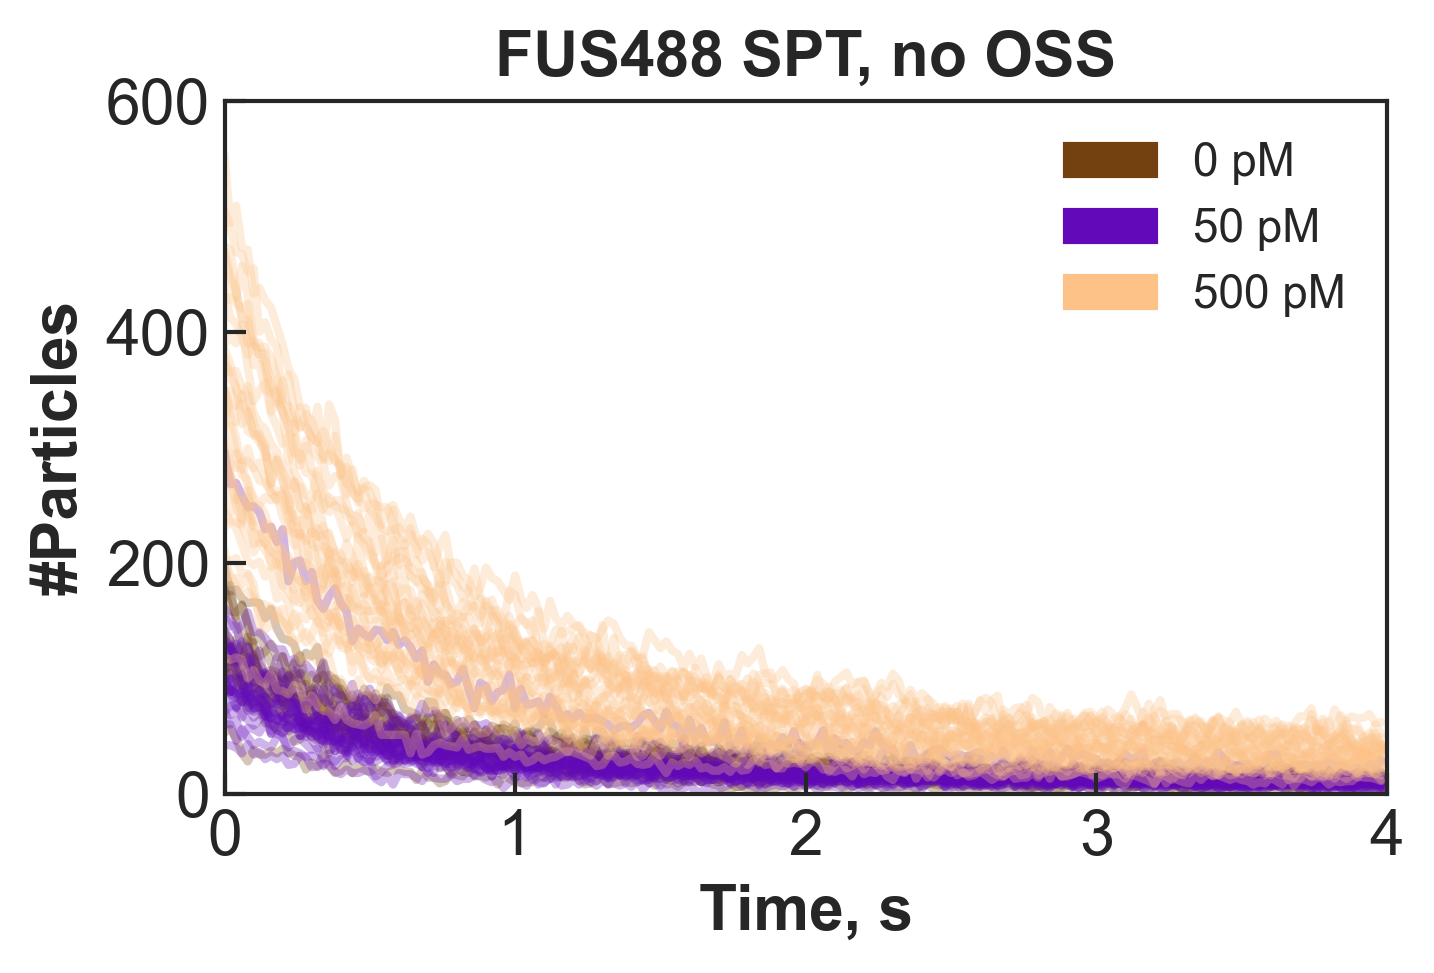

In [27]:
plt.figure(figsize=(5, 3), dpi=300)
for i in range(3):
    lst_df = lst_df_sets[i]
    for df in lst_df:
        frames = sorted(df["t"].unique())
        N_per_frame = [df[df["t"] == t].shape[0] for t in frames]
        plt.plot(
            np.array(frames) * s_per_frame,
            N_per_frame,
            color=colors[i],
            lw=2,
            alpha=0.3,
        )

plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
# mannually create legend
lst_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(3)]
plt.gca().legend(handles=lst_patches, title=None, frameon=False)
plt.title("FUS488 SPT, no OSS", weight="bold", fontsize=15)
plt.xlabel("Time, s", weight="bold", fontsize=15)
plt.ylabel("#Particles", weight="bold", fontsize=15)
plt.xlim(0, 4)
plt.ylim(0, 600)
plt.savefig("noOSS-batch.png", format="png", bbox_inches="tight")
plt.show()

### Mean-STD plot

In [39]:
lst_common_time = []
lst_mean_N = []
lst_std_N = []
for i in range(3):
    lst_df = lst_df_sets[i]
    lst_rows_time = []
    lst_rows_N = []
    for df in lst_df:
        frames = sorted(df["t"].unique())
        frames = frames[:199]
        lst_rows_time.append(np.array(frames) * s_per_frame)
        N_per_frame = [df[df["t"] == t].shape[0] for t in frames]
        N_per_frame = N_per_frame[:199]
        lst_rows_N.append(N_per_frame)
    array_time = np.vstack(lst_rows_time)
    array_N = np.vstack(lst_rows_N)
    common_time = array_time.mean(axis=0)
    mean_N = array_N.mean(axis=0)
    std_N = array_N.std(axis=0)
    lst_common_time.append(common_time)
    lst_mean_N.append(mean_N)
    lst_std_N.append(std_N)

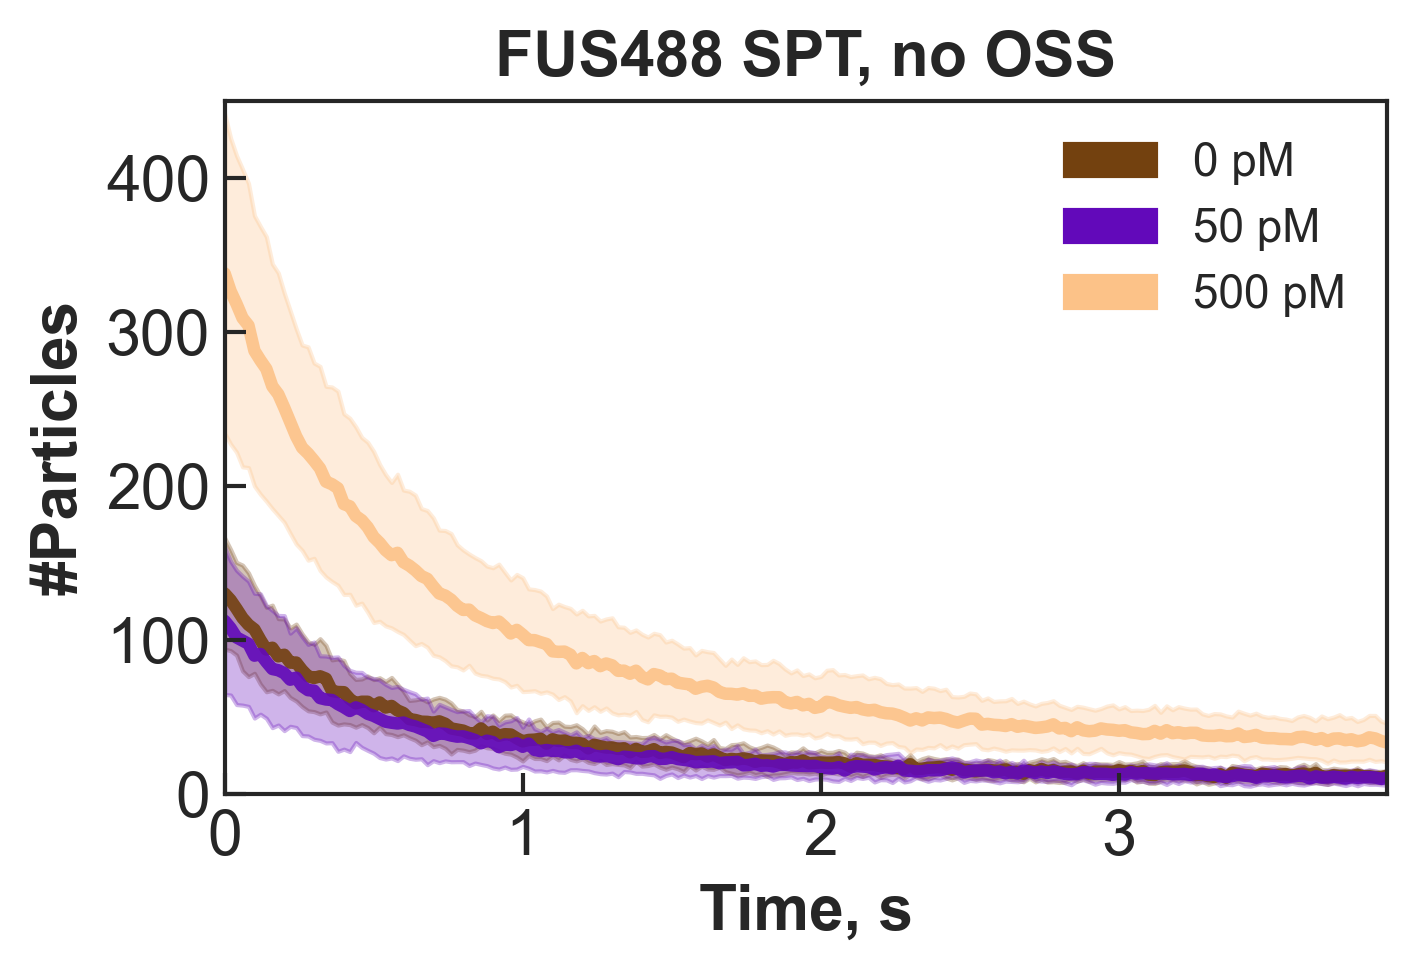

In [43]:
plt.figure(figsize=(5, 3), dpi=300)
for i in range(3):
    common_time = lst_common_time[i]
    mean_N = lst_mean_N[i]
    std_N = lst_std_N[i]
    plt.plot(
        common_time,
        mean_N,
        color=colors[i],
        lw=3,
        alpha=0.9,
    )
    plt.fill_between(
        common_time,
        mean_N - std_N,
        mean_N + std_N,
        color=colors[i],
        alpha=0.3,
    )

plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
# mannually create legend
lst_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(3)]
plt.gca().legend(handles=lst_patches, title=None, frameon=False)
plt.title("FUS488 SPT, no OSS", weight="bold", fontsize=15)
plt.xlabel("Time, s", weight="bold", fontsize=15)
plt.ylabel("#Particles", weight="bold", fontsize=15)
plt.xlim(0, 3.9)
plt.ylim(0, 450)
plt.savefig("noOSS-mean-STD.png", format="png", bbox_inches="tight")
plt.show()

## With OSS, Compare

In [11]:
folder_realALEX = "20230928-500pM-20msALEXwFL-50per"
color = "#00274c"
label = "500 pM, 20 ms ALEX"
s_per_frame = 0.04

lst_df = []
lst_files = [f for f in os.listdir(folder_realALEX) if f.endswith("spots_reformatted.csv")]
for f in lst_files:
    df = pd.read_csv(join(folder_realALEX, f))
    lst_df.append(df)
print(folder_realALEX, "Done!")

20230928-500pM-20msALEXwFL-50per Done!


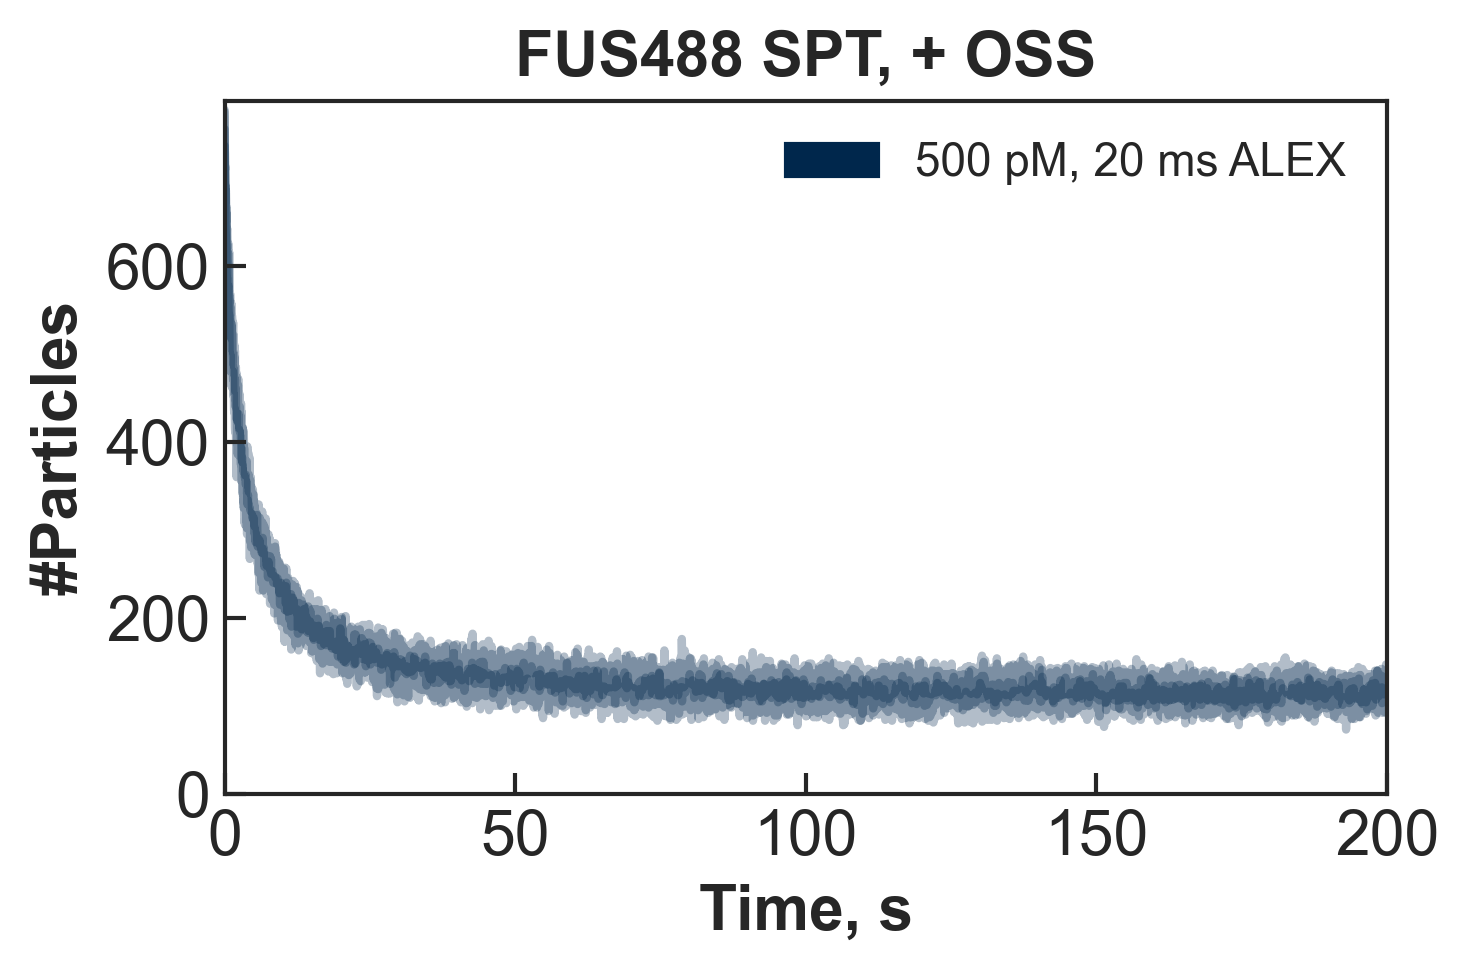

In [17]:
plt.figure(figsize=(5, 3), dpi=300)
for df in lst_df:
    frames = sorted(df["t"].unique())
    N_per_frame = [df[df["t"] == t].shape[0] for t in frames]
    plt.plot(
        np.array(frames) * s_per_frame,
        N_per_frame,
        color=color,
        lw=2,
        alpha=0.3,
    )

plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
# mannually create legend
patch = mpatches.Patch(color=color, label=label)
plt.gca().legend(handles=[patch], title=None, frameon=False)
plt.title("FUS488 SPT, + OSS", weight="bold", fontsize=15)
plt.xlabel("Time, s", weight="bold", fontsize=15)
plt.ylabel("#Particles", weight="bold", fontsize=15)
plt.xlim(0, 200)
plt.ylim(0, np.max(N_per_frame) + 10)
plt.savefig("withOSS-batch.png", format="png", bbox_inches="tight")
plt.show()

In [14]:
lst_rows_time = []
lst_rows_N = []
for df in lst_df:
    frames = sorted(df["t"].unique())
    # frames = frames[:199]
    lst_rows_time.append(np.array(frames) * s_per_frame)
    N_per_frame = [df[df["t"] == t].shape[0] for t in frames]
    # N_per_frame = N_per_frame[:199]
    lst_rows_N.append(N_per_frame)
array_time = np.vstack(lst_rows_time)
array_N = np.vstack(lst_rows_N)
common_time = array_time.mean(axis=0)
mean_N = array_N.mean(axis=0)
std_N = array_N.std(axis=0)

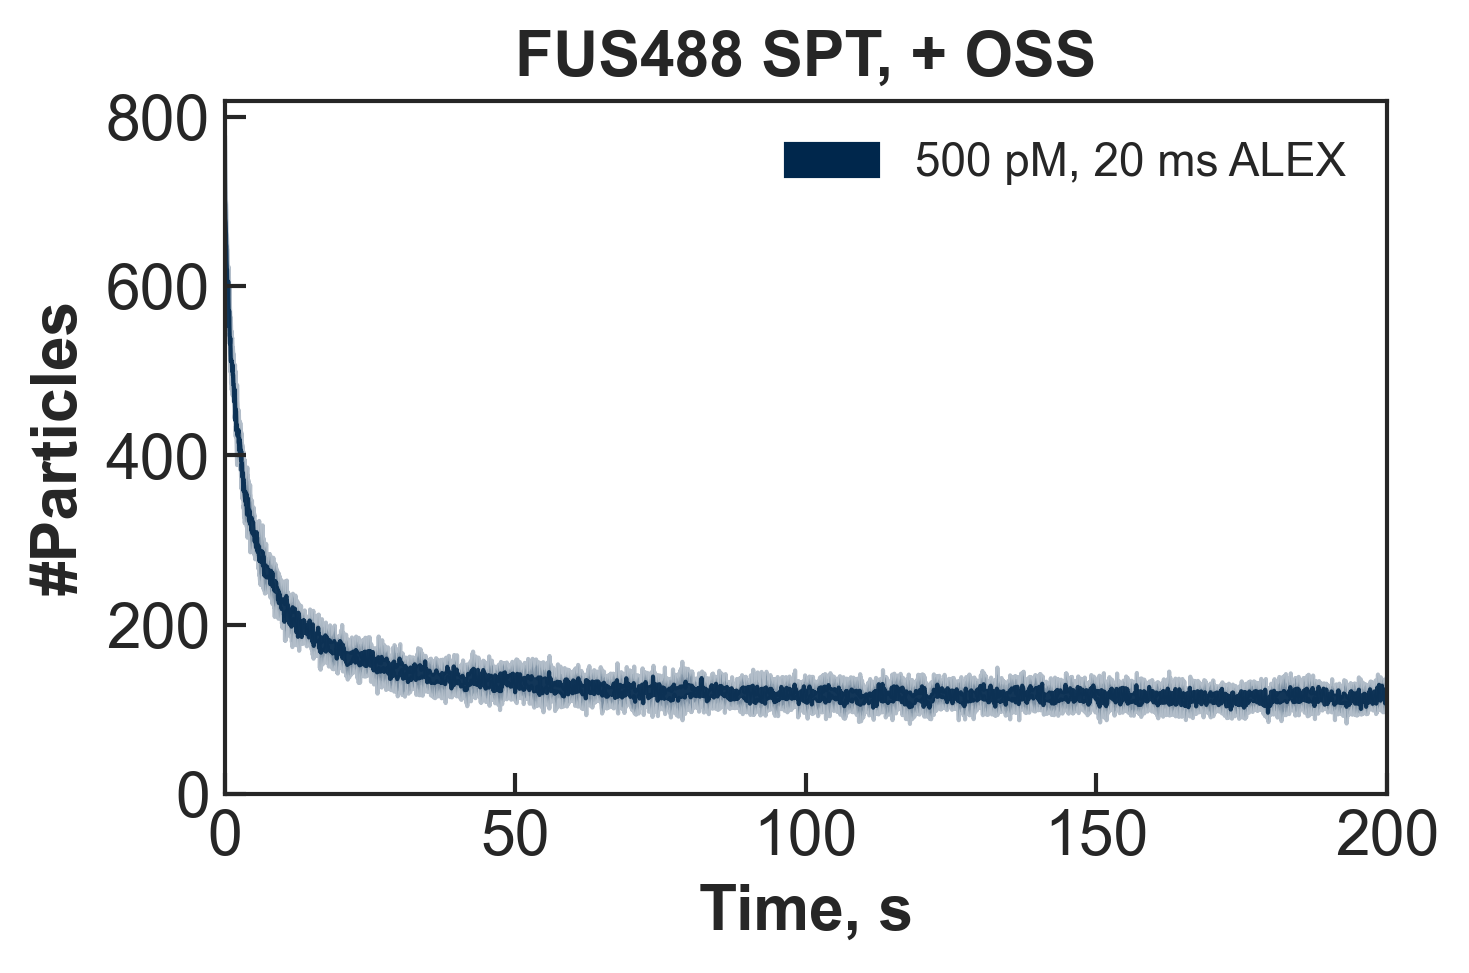

In [18]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(
    common_time,
    mean_N,
    color=color,
    lw=1,
    alpha=0.9,
)
plt.fill_between(
    common_time,
    mean_N - std_N,
    mean_N + std_N,
    color=color,
    alpha=0.3,
)

plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
# mannually create legend
patch = mpatches.Patch(color=color, label=label)
plt.gca().legend(handles=[patch], title=None, frameon=False)
plt.title("FUS488 SPT, + OSS", weight="bold", fontsize=15)
plt.xlabel("Time, s", weight="bold", fontsize=15)
plt.ylabel("#Particles", weight="bold", fontsize=15)
plt.xlim(0, 200)
plt.ylim(0, mean_N.max() + std_N.max() + 10)
plt.savefig("withOSS-mean-STD.png", format="png", bbox_inches="tight")
plt.show()